In [14]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


NLTK : Natural Language Toolit

In [29]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [16]:
nltk.__version__

'3.9.2'

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
with open("../datasets/shakespeare.txt") as f:
    shakespeare = f.readlines()

shakespeare

['THE SONNETS\n',
 '\n',
 'by William Shakespeare\n',
 '\n',
 'From fairest creatures we desire increase,\n',
 "That thereby beauty's rose might never die,\n",
 'But as the riper should by time decease,\n',
 'His tender heir might bear his memory:\n',
 'But thou contracted to thine own bright eyes,\n',
 "Feed'st thy light's flame with self-substantial fuel,\n",
 'Making a famine where abundance lies,\n',
 'Thy self thy foe, to thy sweet self too cruel:\n',
 "Thou that art now the world's fresh ornament,\n",
 'And only herald to the gaudy spring,\n',
 'Within thine own bud buriest thy content,\n',
 "And tender churl mak'st waste in niggarding:\n",
 'Pity the world, or else this glutton be,\n',
 "To eat the world's due, by the grave and thee.\n",
 '\n',
 'When forty winters shall besiege thy brow,\n',
 "And dig deep trenches in thy beauty's field,\n",
 "Thy youth's proud livery so gazed on now,\n",
 'Will be a tattered weed of small worth held:  \n',
 'Then being asked, where all thy bea

In [21]:
txt = " ".join(shakespeare).lower()

txt = re.sub("[^a-z]", " ", txt)
txt

'the sonnets    by william shakespeare    from fairest creatures we desire increase   that thereby beauty s rose might never die   but as the riper should by time decease   his tender heir might bear his memory   but thou contracted to thine own bright eyes   feed st thy light s flame with self substantial fuel   making a famine where abundance lies   thy self thy foe  to thy sweet self too cruel   thou that art now the world s fresh ornament   and only herald to the gaudy spring   within thine own bud buriest thy content   and tender churl mak st waste in niggarding   pity the world  or else this glutton be   to eat the world s due  by the grave and thee     when forty winters shall besiege thy brow   and dig deep trenches in thy beauty s field   thy youth s proud livery so gazed on now   will be a tattered weed of small worth held     then being asked  where all thy beauty lies   where all the treasure of thy lusty days   to say within thine own deep sunken eyes   were an all eating 

In [22]:
tokens = word_tokenize(txt)
tokens

['the',
 'sonnets',
 'by',
 'william',
 'shakespeare',
 'from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beauty',
 's',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feed',
 'st',
 'thy',
 'light',
 's',
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'world',
 's',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'mak',
 'st',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutto

In [24]:
stop_words = list(stopwords.words("english"))
stop_words
# 불용어 사전

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
token_list = list(filter(None, map(lambda x: x if x not in stop_words else None, tokens)))
token_list

['sonnets',
 'william',
 'shakespeare',
 'fairest',
 'creatures',
 'desire',
 'increase',
 'thereby',
 'beauty',
 'rose',
 'might',
 'never',
 'die',
 'riper',
 'time',
 'decease',
 'tender',
 'heir',
 'might',
 'bear',
 'memory',
 'thou',
 'contracted',
 'thine',
 'bright',
 'eyes',
 'feed',
 'st',
 'thy',
 'light',
 'flame',
 'self',
 'substantial',
 'fuel',
 'making',
 'famine',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'thy',
 'sweet',
 'self',
 'cruel',
 'thou',
 'art',
 'world',
 'fresh',
 'ornament',
 'herald',
 'gaudy',
 'spring',
 'within',
 'thine',
 'bud',
 'buriest',
 'thy',
 'content',
 'tender',
 'churl',
 'mak',
 'st',
 'waste',
 'niggarding',
 'pity',
 'world',
 'else',
 'glutton',
 'eat',
 'world',
 'due',
 'grave',
 'thee',
 'forty',
 'winters',
 'shall',
 'besiege',
 'thy',
 'brow',
 'dig',
 'deep',
 'trenches',
 'thy',
 'beauty',
 'field',
 'thy',
 'youth',
 'proud',
 'livery',
 'gazed',
 'tattered',
 'weed',
 'small',
 'worth',
 'held',
 'asked',
 't

In [26]:
token_cnt = dict(Counter(token_list))
token_cnt

{'sonnets': 1,
 'william': 1,
 'shakespeare': 1,
 'fairest': 5,
 'creatures': 2,
 'desire': 11,
 'increase': 4,
 'thereby': 2,
 'beauty': 70,
 'rose': 6,
 'might': 26,
 'never': 16,
 'die': 12,
 'riper': 2,
 'time': 70,
 'decease': 3,
 'tender': 7,
 'heir': 3,
 'bear': 13,
 'memory': 8,
 'thou': 235,
 'contracted': 2,
 'thine': 44,
 'bright': 11,
 'eyes': 53,
 'feed': 2,
 'st': 52,
 'thy': 287,
 'light': 7,
 'flame': 3,
 'self': 88,
 'substantial': 1,
 'fuel': 1,
 'making': 12,
 'famine': 1,
 'abundance': 4,
 'lies': 12,
 'foe': 1,
 'sweet': 57,
 'cruel': 8,
 'art': 52,
 'world': 33,
 'fresh': 7,
 'ornament': 5,
 'herald': 1,
 'gaudy': 1,
 'spring': 5,
 'within': 11,
 'bud': 2,
 'buriest': 1,
 'content': 2,
 'churl': 2,
 'mak': 2,
 'waste': 7,
 'niggarding': 1,
 'pity': 9,
 'else': 5,
 'glutton': 1,
 'eat': 3,
 'due': 6,
 'grave': 3,
 'thee': 162,
 'forty': 1,
 'winters': 2,
 'shall': 59,
 'besiege': 2,
 'brow': 8,
 'dig': 1,
 'deep': 8,
 'trenches': 1,
 'field': 1,
 'youth': 16,
 'pro

In [27]:
token_df = pd.DataFrame.from_dict(token_cnt, orient="index", columns=["freq"])
token_df.index.name = "token"
token_df.sort_values(by="freq", ascending=False, inplace=True)

token_df

,freq
token,
thy,287
thou,235
love,194
thee,162
self,88
...,...
seeting,1
fired,1
trial,1


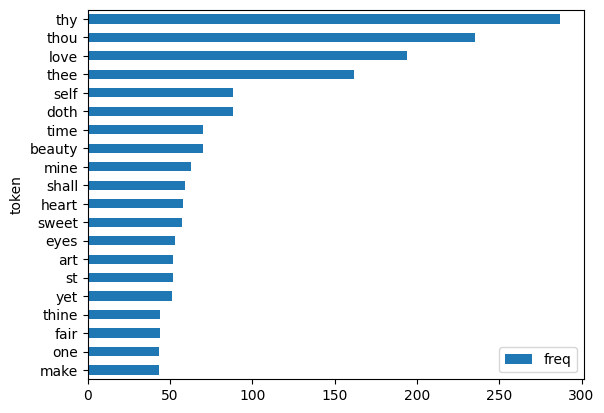

In [28]:
ax = token_df.head(20).plot(kind="barh")
ax.invert_yaxis()

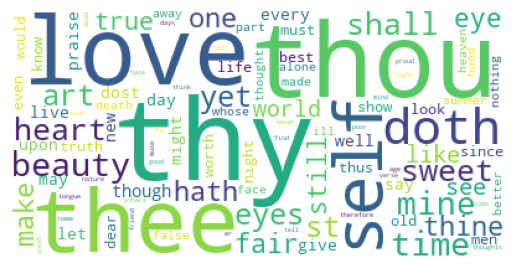

In [30]:
cloud = WordCloud(background_color="white", max_words=100)
visual = cloud.fit_words(token_cnt)

plt.axis("off")

plt.imshow(visual.to_image())